### Olga Iarygina

This is the first assignment for Introduction to Data Science Course.
In this assignment I am going to analyze how does smoking affect lunge capacity. For this I calculate some basic statistical measures and provide some data visualisation.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### exercise 1

a) Fisrt of all, I just read the data, and divide it into 2 groups - smokers and non-smokers.
From the description of the dataset we know, that information about whether the person smokes or not is stored in the 5th column. So, in order to split I just filter the main dataset according the column values.

In [2]:
df = np.loadtxt('smoking.txt')
print(df.shape)

(654, 6)


In [3]:
smokers = df[df[:, 4] == 1]
non_smokers = df[df[:, 4] == 0]

b) Then I compute the average FEV1 scores for smokers and non-smokers separately.

In [4]:
smokers_mean = np.mean(smokers[:, 1])
non_smokers_mean = np.mean(non_smokers[:, 1])
print("Average FEV1 for smokers: ", smokers_mean, 
     "\nAverage FEV1 for non-smokers: ", non_smokers_mean)

Average FEV1 for smokers:  3.2768615384615383 
Average FEV1 for non-smokers:  2.5661426146010187


Quite surprisingly, but the smokers have larger average forced expiratory volume!
Maybe visualisation will provide some insights about the reasons of this illogicality.

### exercise 2

In this exercise I plot the data about FEV1 with boxplots for 2 groups.

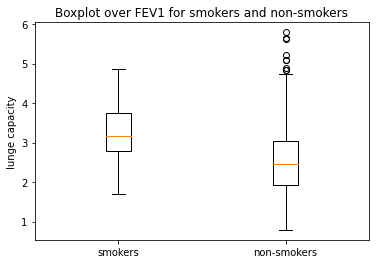

In [8]:
x = smokers[:, 1]
y = non_smokers[:, 1]

labels = ['smokers', 'non-smokers']
plt.boxplot([x, y], labels = labels)

plt.title('Boxplot over FEV1 for smokers and non-smokers')
plt.ylabel('lunge capacity')
plt.show()

So, looking at smokers boxplot, we can see that the their FEV1 is distributed from ~1.5 to ~4.8, with the median value a little bit above 3. And half of the observations are from about ~2.9 to ~3.7.

And we have much lower values for non-smokers. The sallest is lower than 1, median is about ~2.5, and most of the observations do not exceed three. Noticeably, we have some amount of outliers with a АУМ1 of about 5 or more. 

Actually, I am still quite surprised abiut the distributions, so I decided to check how many people are in different groups, and here the results are getting more understandable, since we have almost 9 times more non-smokers than smokers.

In [9]:
print("The number of smokers: ", x.shape,
     "\nThe number of non-smokers: ", y.shape)

The number of smokers:  (65,) 
The number of non-smokers:  (589,)


### exercise 3

So, in order to understand whether the populations have significantly different means, here we move to the two-sided t-test. In this case, the null-hypothesis will be the following:

H0: smokers and non-smokers have the same mean FEV1.

As recommended, I use the significance level of α = 0.05.
I tried to implement the testing by myself and made a function, which returns just a binary responce if the hypothesis is rejected or not. I also decided to scheck myself with a scipy function.

(*) I used scipy also to calculate Cumulative Distrivution Function and the inverse of it

In [11]:
from scipy.stats import t

def ttest(sample1, sample2, alpha):
    
    # means
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    # standard errors
    se1, se2 = (np.std(sample1, ddof = 1) / np.sqrt(np.size(sample1))), (np.std(sample2, ddof = 1) / np.sqrt(np.size(sample2)))
    # standard errors of the difference between two samples
    se_diff = np.sqrt(se1 ** 2 + se2 ** 2)
    # t-statistic
    t_stat = (mean1 - mean2) / se_diff
    # degrees of freedom
    dof = (len(sample1) + len(sample2)) - 2
    # critical value
    cv = t.ppf(1 - alpha, dof)
    # p-value
    p_value = (1.0 - t.cdf(abs(t_stat), dof)) * 2
    
    # rejection
    rej = 0
    if p_value < 0.05:
        rej = True
    else:
        rej = False
    
    return print("T-statistic: ", t_stat, 
                 "\nDegrees of Freedom: ", dof,
                 "\nP-value: ", p_value, 
                 "\nCan we reject the H0?: ", rej)

In [12]:
ttest(x, y, 0.05)

T-statistic:  7.149608129503808 
Degrees of Freedom:  652 
P-value:  2.34168240353938e-12 
Can we reject the H0?:  True


In [13]:
from scipy import stats
print(stats.ttest_ind(x, y))

Ttest_indResult(statistic=6.46445317259654, pvalue=1.9928459182932803e-10)


The values of t-statistic, which measures the standardized difference between the two sample means, are slightly different in my implementation and SciPy function. Hence, the p-value is much smaller than 0.05 in both cases, which means that the probability that the results from the sample data occurred by chance is minimal. Therefore, we can reject the null-hypothesis that smokers and non-smokers have the same mean FEV1.

Quite surprising again, really!

### exercise 4

In this exercise we proceed to computing thecorrelation between age and FEV1. 
I plot it then in 2D with different colors for smokers and non-smokers.

In [14]:
corr = np.corrcoef(df[:, 0], df[:, 1])
print(corr)

[[1.         0.75645899]
 [0.75645899 1.        ]]


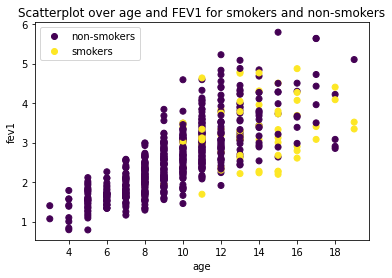

In [17]:
scatter = plt.scatter(df[:, 0], df[:, 1], c = df[:, 4], cmap='viridis')

classes = ["non-smokers", "smokers"]
plt.legend(handles = scatter.legend_elements()[0], 
           labels = classes)

plt.title('Scatterplot over age and FEV1 for smokers and non-smokers')
plt.xlabel('age')
plt.ylabel('fev1')

plt.show()

Well, things are getting more and more interesting. First of all, I did not expect that the sample is composed of so yong people.
That explains literally everything. 
We definetely have 9 times less smokers because all people are under 20, and children are not supposed to smoke usually.
We have such small values of FEV1 for non-smokers just because these are the lunges of children of 4 years old. 
And we have the larger mean FEV1 for non-smokers, because these people are just older than children who are corny small in size. 

And we see a positive correlation coefficient, supporting the claim that lunge capacity depends on age, at least for people under 20, since people are tend to grow up during this span of life. So, the elder the person, the higher FEV1 he/she has.

### exercise 5

Finally, in order to support my claims, I visualise the age distriution for smokers and non-smokers separately.
And we see that most of the sample is composed of people from 8 to twelve. And it is slightly left-skewed, so we have not a lot of people older than 14. While in this sample the youngest smoking person is 9 years old. 

That is why we got such unexpected numbers in the first excersises.

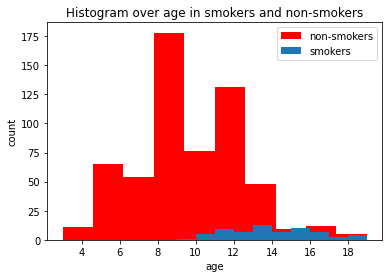

In [21]:
plt.hist(non_smokers[:, 0], color = 'red', label = 'non-smokers')
plt.hist(smokers[:, 0], label = 'smokers')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram over age in smokers and non-smokers')
plt.legend()

plt.show()